In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [292]:
t_range = (0, 1000)
t_grid_size = 3
x_range = (0, 0.05)
x_grid_size = 0.001

t_grid_count = int((t_range[1] - t_range[0]) / t_grid_size)
x_grid_count = int((x_range[1] - x_range[0]) / x_grid_size)

t_grid = np.linspace(t_range[0], t_range[1], t_grid_count + 1)
x_grid = np.linspace(x_range[0], x_range[1], x_grid_count + 1)



In [293]:
k = 0.479 # thermal conductivity [W/mk]
p = 1176  # density [kg/m^3]
c_p = 2893 # specific heat  [j/Kg*k]
alpha = k / p / c_p

F = t_grid_size / (x_grid_size**2) * alpha
print(F)
print(1-2*F, " should be bigger than 0")

0.4223777309057048
0.1552445381885904  should be bigger than 0


In [294]:
def iterate(space, F):
    for i in range(1, space.shape[0]):
        for j in range(1, space.shape[1] - 1):
            space[i,j] = (1-2*F) * space[i-1,j] + F * space[i-1,j-1] + F * space[i-1,j+1]
            if (i == 40 and j == 1):
                print(f'{(1-2*F) * space[i-1,j]} + {F * space[i-1,j-1]} + {F * space[i-1,j+1]}')
                print(f'{i}, {j}: {space[i,j]}')
                print(space[i-10:i+1, :])
                print("============")
    
    print(space)
    print(f"Center temp is {space[space.shape[0] // 2][space.shape[1] // 2]}")

In [295]:
space = np.full((t_grid_count, x_grid_count), 275)  # 275 K intial temp
space[0,:] = 275
space[:,0] = 373.15
space[:,-1] = 373.15
print(space.shape)
print("=============")
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})
iterate(space, F)

(333, 50)
55.1118110569496 + 157.5468936278279 + 142.76367304612822
40, 1: 355
[[373 353 336 320 307 296 288 281 277 275 275 275 275 275 275 275 275 275
  275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275
  275 275 275 275 275 277 281 288 296 307 320 336 353 373]
 [373 354 336 321 307 297 288 282 277 275 275 275 275 275 275 275 275 275
  275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275
  275 275 275 275 275 277 282 288 297 307 321 336 354 373]
 [373 354 337 321 308 297 289 282 278 275 275 275 275 275 275 275 275 275
  275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275
  275 275 275 275 275 278 282 289 297 308 321 337 354 373]
 [373 354 337 322 308 298 289 283 278 276 275 275 275 275 275 275 275 275
  275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275 275
  275 275 275 275 276 278 283 289 298 308 322 337 354 373]
 [373 354 337 322 309 298 290 283 279 276 275 275 275 275 275 275 275 275
  275 275 275 275 2

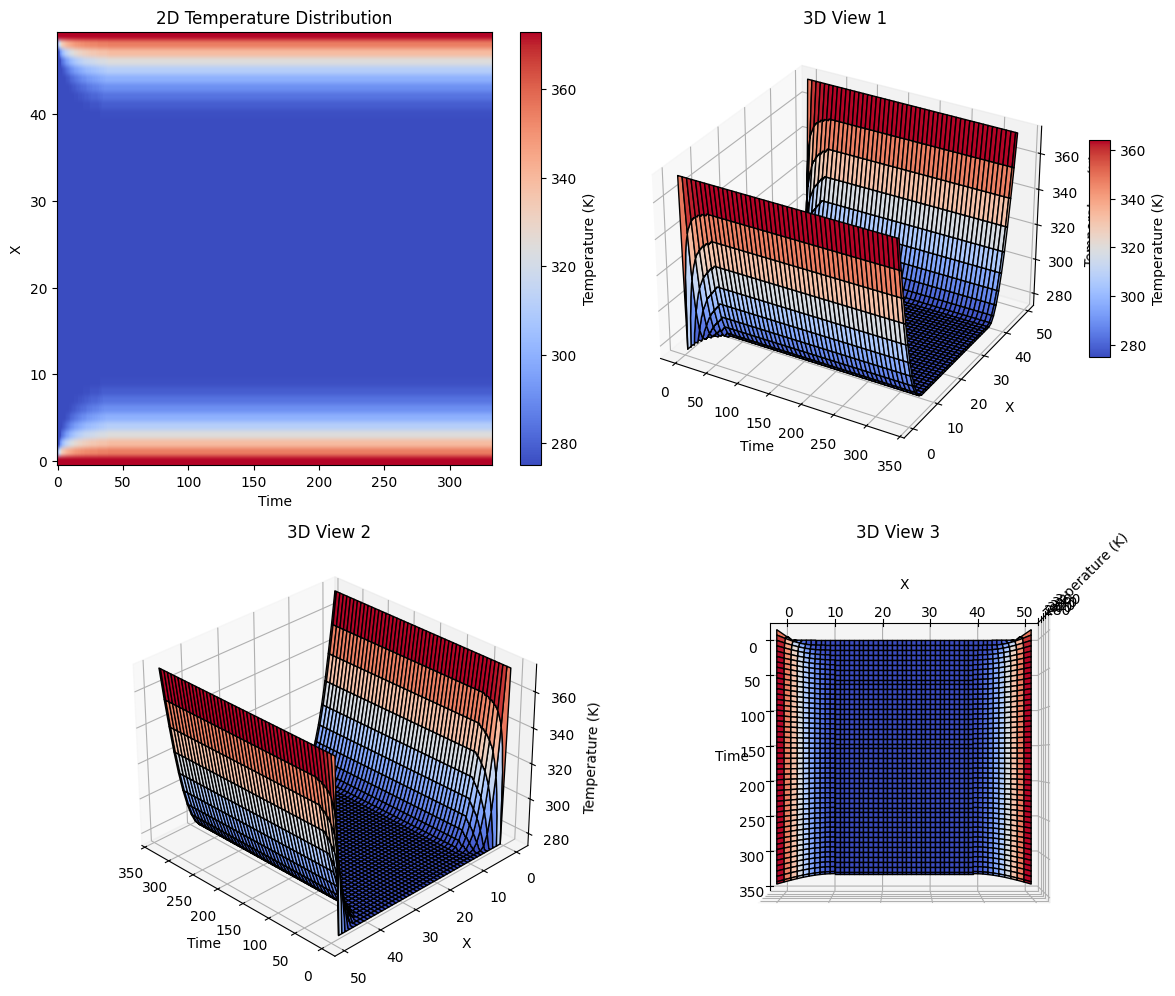

In [296]:

def plot_temperature(space: np.ndarray):
    """
    Plots a temperature grid with multiple views: 
    - One 2D heatmap
    - Three 3D surface plots from different angles
    
    :param space: np.ndarray of shape (n, m) containing temperature values.
    """
    n, m = space.shape
    x = np.arange(n)
    y = np.arange(m)
    X, Y = np.meshgrid(x, y)
    
    fig = plt.figure(figsize=(12, 10))
    
    # 2D Heatmap
    ax1 = fig.add_subplot(2, 2, 1)
    c = ax1.imshow(space.T, cmap='coolwarm', origin='lower', aspect='auto')
    fig.colorbar(c, ax=ax1, label='Temperature (K)')
    ax1.set_xlabel("Time")
    ax1.set_ylabel("X")
    ax1.set_title("2D Temperature Distribution")
    
    # 3D Surface Plot - Default View
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    surf = ax2.plot_surface(X, Y, space.T, cmap='coolwarm', edgecolor='k')
    ax2.set_xlabel("Time")
    ax2.set_ylabel("X")
    ax2.set_zlabel("Temperature (K)")
    ax2.set_title("3D View 1")
    fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=10, label='Temperature (K)')
    
    # 3D Surface Plot - Rotated View
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    surf = ax3.plot_surface(X, Y, space.T, cmap='coolwarm', edgecolor='k')
    ax3.view_init(elev=30, azim=135)  # Rotate view
    ax3.set_xlabel("Time")
    ax3.set_ylabel("X")
    ax3.set_zlabel("Temperature (K)")
    ax3.set_title("3D View 2")
    
    # 3D Surface Plot - Top-Down View
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    surf = ax4.plot_surface(X, Y, space.T, cmap='coolwarm', edgecolor='k')
    ax4.view_init(elev=90, azim=0)  # Top-down view
    ax4.set_xlabel("Time")
    ax4.set_ylabel("X")
    ax4.set_zlabel("Temperature (K)")
    ax4.set_title("3D View 3")
    
    plt.tight_layout()
    plt.show()

plot_temperature(space)

In [313]:
f = 0.1
A = np.zeros([200,5])
A[:, 0] = 100
A[:, -1] = 100
for i in range(1, A.shape[0]):
    for j in range(1, A.shape[1] - 1):
        A[i,j] = (1-2*f) * A[i-1, j] + f*A[i-1, j-1] + f*A[i-1, j+1]

print(A)

[[100.00000 0.00000 0.00000 0.00000 100.00000]
 [100.00000 10.00000 0.00000 10.00000 100.00000]
 [100.00000 18.00000 2.00000 18.00000 100.00000]
 [100.00000 24.60000 5.20000 24.60000 100.00000]
 [100.00000 30.20000 9.08000 30.20000 100.00000]
 [100.00000 35.06800 13.30400 35.06800 100.00000]
 [100.00000 39.38480 17.65680 39.38480 100.00000]
 [100.00000 43.27352 22.00240 43.27352 100.00000]
 [100.00000 46.81906 26.25662 46.81906 100.00000]
 [100.00000 50.08091 30.36911 50.08091 100.00000]
 [100.00000 53.10164 34.31147 53.10164 100.00000]
 [100.00000 55.91246 38.06950 55.91246 100.00000]
 [100.00000 58.53692 41.63809 58.53692 100.00000]
 [100.00000 60.99334 45.01786 60.99334 100.00000]
 [100.00000 63.29646 48.21295 63.29646 100.00000]
 [100.00000 65.45846 51.22966 65.45846 100.00000]
 [100.00000 67.48974 54.07542 67.48974 100.00000]
 [100.00000 69.39933 56.75828 69.39933 100.00000]
 [100.00000 71.19529 59.28649 71.19529 100.00000]
 [100.00000 72.88488 61.66825 72.88488 100.00000]
 [100.0

In [8]:
a = np.array([
    [1,0,0],
    [2,0,0],
    [2,2,1]
])

b = np.min(a, axis=1)

In [9]:
for i, t in enumerate(b):
    print(i, t)

0 0
1 0
2 1
